# Bibliometric Anaysis

[Information about the study](./README.md)

## Installing Required Packages

This code snippet aims to install the necessary R packages (tidyverse, bibliometrix, and clipr) if they are not already installed on your system. It identifies the missing packages from the list of desired packages and installs them using the install.packages() function.  This ensures that you have all the necessary packages for your R analysis without manually installing each one individually.

- n_packages <- c("tidyverse", "bibliometrix","clipr"): This line creates a character vector named n_packages containing the names of the packages you want to install: tidyverse, bibliometrix, and clipr.

- packages <- n_packages[!(n_packages %in% installed.packages()[,"Package"])]: This line filters the n_packages vector to include only the packages that are not already installed on your system.
- installed.packages() returns a data frame with information about all installed packages.
- installed.packages()[,"Package"] extracts the "Package" column from this data frame, containing the names of the installed packages.
- !(n_packages %in% installed.packages()[,"Package"]) checks if each package in n_packages is present in the "Package" column of installed.packages(). The ! operator negates the result, so only the packages that are not installed are kept. The filtered packages are stored in the packages variable.
- if(length(packages)) install.packages(packages): This line checks if the packages vector is not empty (i.e., if there are any packages that need to be installed). If packages is not empty, the install.packages() function is called with the packages argument. This function installs the specified packages from the appropriate repositories.


In [1]:
n_packages <- c("tidyverse", "bibliometrix","clipr","ggthemes")
packages <- n_packages[!(n_packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(packages)

## Loading required packages

This code snippet loads two essential R libraries, bibliometrix and tidyverse, into your R environment. These libraries provide a comprehensive set of tools for bibliometric analysis and data manipulation, respectively.

- library(bibliometrix): This line loads the bibliometrix package, which is specifically designed for bibliometric analysis. It offers functions to import, clean, analyze, and visualize bibliographic data.
  - Key functionalities of bibliometrix include:
  - Importing bibliographic data from various formats (e.g., CSV, RIS, BibTeX)
  - Cleaning and standardizing bibliographic data
  - Calculating bibliometric indicators (e.g., citations, h-index, g-index)-
  - Creating bibliometric networks and visualizations
  - Performing co-authorship and co-citation analysis

- library(tidyverse): This line loads the tidyverse metapackage, which is a collection of R packages that work together seamlessly for data manipulation, transformation, and visualization.
  - The tidyverse includes several key packages, such as:
  - dplyr: For data manipulation and transformation (e.g., filtering, grouping, summarizing)
  - ggplot2: For creating elegant and customizable visualizations
  - tidyr: For data tidying and reshaping (e.g., pivoting, gathering)
  - readr: For reading data into R efficiently (e.g., CSV, TSV)
  - purrr: For functional programming and iteration
  - stringr: For working with strings and text data
  - forcats: For working with categorical variables

By loading these two libraries, you gain access to a powerful toolkit for conducting bibliometric research and data analysis. bibliometrix provides specialized functions for handling bibliographic data, while tidyverse offers a flexible and efficient framework for data manipulation and visualization. Together, these libraries enable you to perform a wide range of bibliometric tasks, from data cleaning and analysis to creating informative visualizations.

In [2]:
library(bibliometrix)
library(tidyverse)
library(ggthemes)

Please note that our software is open source and available for use, distributed under the MIT license.
When it is used in a publication, we ask that authors properly cite the following reference:

Aria, M. & Cuccurullo, C. (2017) bibliometrix: An R-tool for comprehensive science mapping analysis, 
                        Journal of Informetrics, 11(4), pp 959-975, Elsevier.

Failure to properly cite the software is considered a violation of the license.
                        
For information and bug reports:
                        - Take a look at https://www.bibliometrix.org
                        - Send an email to info@bibliometrix.org   
                        - Write a post on https://github.com/massimoaria/bibliometrix/issues
                        
Help us to keep Bibliometrix and Biblioshiny free to download and use by contributing with a small donation to support our research team (https://bibliometrix.org/donate.html)

                        
To start with the Bibliosh

## Converting Dataset from Web of Science BibTeX Format

Please note that the bibliographic data used in this repository will not be shared directly due to copyright restrictions and data ownership by Clarivate. However, the data can be obtained by exporting it from the Web of Science website using the provided query link:

https://www.webofscience.com/wos/woscc/summary/8733a411-8127-45b7-b4dc-711234d77a08-01186ece8c/relevance/1

To ensure accurate and complete data, it is recommended to export the data in BibTeX format, including full records and cited references.

This code snippet imports bibliographic data from a BibTeX file named wos.bib into an R data frame named M. 

When exporting bibliographic data from the Web of Science (WoS) database for further analysis, it's crucial to select the appropriate format and ensure that cited references are included. The BibTeX format, in particular, provides a structured and standardized way to represent bibliographic information, which is essential for efficient data processing and analysis.

- convert2df:
        This function is from the bibliometrix package, which is specifically designed for bibliometric analysis.
        It is used to convert bibliographic data from various formats (e.g., BibTeX, RIS, CSV) into a standardized R data frame format.

- file = "./data/wos.bib":
        This argument specifies the path to the BibTeX file containing the bibliographic data.
        The file is assumed to be located in a directory named data within the current working directory.

- dbsource = "wos":
        This argument indicates that the bibliographic data is from the Web of Science (WoS) database.
        This information is used by the convert2df function to ensure proper handling of specific WoS data fields.

- format = "bibtex":
        This argument specifies that the input file is in BibTeX format.
        This information is used by the convert2df function to correctly parse and extract the bibliographic data.

The code snippet effectively reads the BibTeX file wos.bib containing WoS data and converts it into a well-structured R data frame M.
    The M data frame will contain columns representing various bibliographic fields, such as author names, publication year, title, journal, keywords, and citation counts.
    Once the data is imported, you can use the bibliometrix package to perform various bibliometric analyses on it, such as calculating citation metrics, creating co-author networks, and visualizing publication trends.

In [3]:
M <- convert2df(file = "./data/wos.bib", dbsource = "wos", format = "bibtex")
M <- M |> filter(PY <= 2023)


Converting your wos collection into a bibliographic dataframe

Done!


Generating affiliation field tag AU_UN from C1:  Done!



## Conducting Bibliometric Analysis and Preparing Results Dataset

This code snippet performs a bibliometric analysis on the bibliographic data stored in the R data frame M. The biblioAnalysis function from the bibliometrix package is used to calculate various bibliometric indicators and create summary statistics.

- biblioAnalysis:
        This function is from the bibliometrix package, which is specifically designed for bibliometric analysis.
        It takes the bibliographic data as input and performs a comprehensive analysis, calculating various metrics related to citation patterns, author productivity, and publication trends.
- M:
        This is the R data frame containing the bibliographic data. It is assumed to have been created using the convert2df function from the bibliometrix package, as discussed in previous responses.

- sep = ";":
        This argument specifies the separator used to delimit multiple values in the bibliographic data. In this case, it is assumed that multiple authors, keywords, or affiliations are separated by semicolons.

In [4]:
results <- biblioAnalysis(M, sep =";")

## Summarizing All Results from Bibliometric Analysis

The summary(results) function in R provides a concise overview of the data contained within the results object. When used with the output of the biblioAnalysis function from the bibliometrix package, it can give you a quick summary of the key bibliometric indicators and statistics calculated.

Output:

- Citation metrics: Total citations, average citations per paper etc.
- Author productivity: Number of publications per author, most productive authors, etc.
- Publication trends: Publication year distribution, most cited journals, etc.
- Keyword analysis: Most frequent keywords, keyword co-occurrence networks, etc.

In [5]:
summary(results)



MAIN INFORMATION ABOUT DATA

 Timespan                              1984 : 2023 
 Sources (Journals, Books, etc)        161 
 Documents                             291 
 Annual Growth Rate %                  9.2 
 Document Average Age                  6.15 
 Average citations per doc             6.615 
 Average citations per year per doc    0.9843 
 References                            8500 
 
DOCUMENT TYPES                     
 article                         247 
 article; book chapter           7 
 article; data paper             2 
 article; proceedings paper      2 
 proceedings paper               26 
 review                          7 
 
DOCUMENT CONTENTS
 Keywords Plus (ID)                    564 
 Author's Keywords (DE)                1315 
 
AUTHORS
 Authors                               2293 
 Author Appearances                    2828 
 Authors of single-authored docs       28 
 
AUTHORS COLLABORATION
 Single-authored docs                  34 
 Documents per Author     

## The first 15 rows of the most cited documents

The results\$MostCitedPapers[1:15,] expression in R extracts the first 15 rows of the MostCitedPapers data frame within the results object.

- results: This refers to the object that contains the results of the bibliometric analysis performed using the biblioAnalysis function from the bibliometrix package.
- $MostCitedPapers: This extracts the MostCitedPapers data from within the results object. This data typically contains information about the most cited papers in the analysis, including their title, author(s), publication year, and citation count.
- [1:15,]: This indexing expression selects the first 15 rows of the MostCitedPapers data frame. The 1:15 part specifies the row numbers, and the comma indicates that all columns should be included.

In [6]:
results$MostCitedPapers[1:15,]

,Paper,DOI,TC,TCperYear,NTC
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,"NADERI S, 2008, PROC NATL ACAD SCI U S A",10.1073/pnas.0804782105,225,13.235294,1.584507
2,"ADAMS HHH, 2016, NAT NEUROSCI",10.1038/nn.4398,161,17.888889,7.453704
3,"SATIZABAL CL, 2019, NATURE GENET",10.1038/s41588-019-0511-y,160,26.666667,13.445378
4,"CROUS PW, 2021, PERSOONIA",10.3767/persoonia.2021.46.11,97,24.250000,24.095541
5,"FRITZ U, 2007, AMPHIB REPTIL",10.1163/156853807779799135,92,5.111111,1.628319
6,"DUFRESNES C, 2019, MOL PHYLOGENET EVOL",10.1016/j.ympev.2019.106615,73,12.166667,6.134454
7,"FRITZ U, 2008, J EVOL BIOL",10.1111/j.1420-9101.2007.01485.x,59,3.470588,0.415493
8,"PODKOLZIN AT, 2009, J INFECT DIS",10.1086/605054,50,3.125000,2.941176
9,"PHIPPS WL, 2019, FRONT ECOL EVOL",10.3389/fevo.2019.00323,50,8.333333,4.201681


## Preparing Local Citations Matrix

The CR <- localCitations(M, sep = ";") expression in R calculates the local citation counts for each document in the bibliographic data stored in the M data frame.

- localCitations: This function is from the bibliometrix package, which is specifically designed for bibliometric analysis. It calculates the local citation counts for each document based on the references cited within that document.
- M: This is the R data frame containing the bibliographic data. It is assumed to have been created using the convert2df function from the bibliometrix package, as discussed in previous responses.
- sep = ";": This argument specifies the separator used to delimit multiple values in the bibliographic data. In this case, it is assumed that multiple authors, keywords, or affiliations are separated by semicolons.

In [7]:
CR <- localCitations(M, sep = ";")

## The First 15 Documents with the Most Local Citations

The print(CR\$Papers[1:15,]) expression in R is used to display the first 15 rows of the Papers data frame within the CR object.

- CR: This refers to the object that contains the results of the local citation analysis performed using the localCitations function from the bibliometrix package.
- $Papers: This extracts the Papers data frame from within the CR object. This data frame typically contains information about the papers included in the analysis, such as their unique identifier, title, author(s), publication year, and local citation count.
- [1:15,]: This indexing expression selects the first 15 rows of the Papers data frame. The 1:15 part specifies the row numbers, and the comma indicates that all columns should be included.
- print(): This function is used to display the selected rows of the Papers data frame in a human-readable format.

In [8]:
print(CR$Papers[1:15,])

                                     Paper                                  DOI Year LCS GCS
58            NABOZHENKO M, 2016, ANN ZOOL     10.3161/00034541ANZ2016.66.4.013 2016   2   6
25        ZALIBEKOV ZG, 2011, ARID ECOSYST            10.1134/S2079096111010094 2011   1  29
27             SIDORCHUK EA, 2011, ZOOTAXA                                      2011   1  11
28           SIDORCHUK EA, 2011, ZOOTAXA-a                                      2011   1  10
33        NURMAGOMEDOV AA, 2012, RUSS MATH            10.3103/S1066369X12070080 2012   1   3
35      BALAMIRZOEV MA, 2013, ARID ECOSYST            10.1134/S2079096113010071 2013   1   2
59           ADAMS HHH, 2016, NAT NEUROSCI                      10.1038/nn.4398 2016   1 161
103      GAVASHELISHVILI A, 2018, J MAMMAL               10.1093/jmammal/gyy056 2018   1   4
118   KAPUSTINA E, 2019, J SOC POLICY STUD  10.17323/727-0634-2019-17-1-103-118 2019   1   4
150            DUFRESNES C, 2019, MOL ECOL                    10.1111/

## Printing Top 10 Authors with the Most Local Citations

The code snippet you provided is used to print the top 10 authors with the most local citations from a bibliometric analysis.

- CR: This refers to the object that contains the results of the local citation analysis. It is assumed that the localCitations function from the bibliometrix package was used to create this object.
- $Authors: This extracts the Authors data frame from within the CR object. This data frame typically contains information about the authors and their corresponding local citation counts.
- [1:10,]: This indexing expression selects the first 10 rows of the Authors data frame. This will give you the top 10 authors with the most local citations, assuming the data frame is sorted by local citation count in descending order.
- print(): This function is used to display the selected rows of the Authors data frame in a human-readable format.

In [9]:
print(CR$Authors[1:10,])

                Author LocalCitations
690  GAVASHELISHVILI A              3
1192     LITVINCHUK SN              3
1447      NABOZHENKO M              3
2234      YAROVENKO YA              3
1                 A. A              2
29     ABDURAKHMANOV G              2
42            AFRIN KA              2
65            AKKIEV M              2
483           DENOEL M              2
526            DUBEY S              2


## Calculating and Sorting Author Dominance Factor Scores
The DF <- dominance(results, k = 10) and print(DF) code in R are used to calculate and print the dominance index for the top 10 most cited papers in a bibliometric analysis.

- DF <- dominance(results, k = 10):
  -  dominance: This function from the bibliometrix package calculates the dominance index for a set of authors. The dominance index measures the concentration of citations among the top-cited authors.
  - results: This is the object that contains the results of the bibliometric analysis. 
  - k = 10: This argument specifies the number of authors to be considered when calculating the dominance index for table formatting. The default value is 10.

- print(DF):
  - This line prints the calculated dominance index value.

In [10]:
DF <- dominance(results, k = 10)
print(DF)

              Author Dominance Factor Tot Articles Single-Authored Multi-Authored First-Authored Rank by Articles
1       OZDEMIROV AA        1.0000000            5               0              5              5                1
2       NABOZHENKO M        0.8000000            5               0              5              4                1
3      BEKSHOKOVA PA        0.7500000            4               0              4              3                3
4       AYTEMIROV AA        0.6666667            3               0              3              2                8
5         BABAEVA ZS        0.6666667            3               0              3              2                8
6  GASANGADZHIEVA AG        0.5000000            4               0              4              2                3
7           KIDOV AA        0.5000000            4               0              4              2                3
8     ASHURBEKOVA TN        0.3333333            3               0              3       

## Preparing Top Authors' Performance Index Scores

The provided R code snippet calculates the h-index, m-index  and g-index for a set of authors based on the bibliographic data stored in the M data frame.

Breakdown:

- authors=gsub(","," ",names(results\$Authors)):
  - names(results\$Authors): This extracts the names of the authors from the Authors data frame within the results object.
  - gsub(","," ",names(results$Authors)): This replaces all commas with spaces in the author names. This is often necessary to ensure proper handling of author names with multiple parts (e.g., first name, last name, middle name).

- indices <- Hindex(M, field = "author", elements=authors, sep = ";", years = 70):
  - Hindex: This function from the bibliometrix package calculates the h-index for a specified set of authors.
  - M: This is the R data frame containing the bibliographic data.
  - field = "author": This specifies that the h-index should be calculated for authors.
  - elements=authors: This provides the list of authors for whom the h-index should be calculated.
  - sep = ";": This specifies the separator used to delimit multiple values in the bibliographic data. In this case, it is assumed that multiple authors, keywords, or affiliations are separated by semicolons.
  - years = 70: This specifies that the h-index should be calculated considering publications from the past 70 years.

Output:

The indices object will contain the calculated h-index, m-index  and g-index values for each author in the authors list. The output format will typically be a named vector, where the names correspond to the author names and the values correspond to their respective h-indices.

In [11]:
authors=gsub(","," ",names(results$Authors))
indices <- Hindex(M, field = "author", elements=authors, sep = ";", years = 70)

## Printing Top 10 Authors with the Highest h-index Scores

The provided R code snippet calculates the h-index for a set of authors and then prints the top 10 authors with the highest h-index values.

Breakdown:

- indices$H:
        This extracts the H column from the indices object.

- |> arrange(desc(h_index)):
        This pipes the indices$H object to the arrange function from the dplyr package.
        arrange(desc(h_index)) sorts the data frame in descending order based on the h_index column. This means that the authors with the highest h-index values will be at the top.

- |> head(10):
        This pipes the sorted data frame to the head function from the dplyr package.
        head(10) selects the first 10 rows of the sorted data frame, effectively extracting the top 10 authors with the highest h-index values.

In [12]:
indices$H |> arrange(desc(h_index)) |> head(10)

,Element,h_index,g_index,m_index,TC,NP,PY_start
,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,A. A,5,15,0.4166667,452,15,2013
2,KOSMAN E,4,4,0.4444444,39,4,2016
3,LITVINCHUK SN,4,6,0.6666667,68,6,2019
4,M. M,4,7,0.4444444,581,7,2016
5,P. P,4,6,0.2500000,223,6,2009
6,V. V,4,8,0.8000000,65,8,2020
7,AKHMETOVA A,3,3,0.3333333,33,3,2016
8,AUER M,3,3,0.1666667,224,3,2007
9,DOTSEV A,3,4,0.6000000,28,4,2020


## Printing Top 10 Authors with the Highest g-index Scores

The provided R code snippet calculates the g-index for a set of authors and then prints the top 10 authors with the highest g-index values.

Breakdown:

- indices$H: This extracts the H column from the indices object.

- |> arrange(desc(g_index)): This pipes the indices$H object to the arrange function from the dplyr package. arrange(desc(g_index)) sorts the data frame in descending order based on the g_index column. This means that the authors with the highest g-index values will be at the top.

- |> head(10): This pipes the sorted data frame to the head function from the dplyr package. head(10) selects the first 10 rows of the sorted data frame, effectively extracting the top 10 authors with the highest g-index values.


In [13]:
indices$H |> arrange(desc(g_index)) |> head(10)

,Element,h_index,g_index,m_index,TC,NP,PY_start
,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,A. A,5,15,0.4166667,452,15,2013
2,V. V,4,8,0.8000000,65,8,2020
3,M. M,4,7,0.4444444,581,7,2016
4,LITVINCHUK SN,4,6,0.6666667,68,6,2019
5,ORLOV AM,3,6,0.3333333,38,8,2016
6,P. P,4,6,0.2500000,223,6,2009
7,DOTSEV A,3,4,0.6000000,28,4,2020
8,EBEL AL,2,4,0.4000000,32,4,2020
9,GAVASHELISHVILI A,3,4,0.4285714,24,4,2018


## Printing Top 10 Authors with the Highest m-index Scores

The provided R code snippet calculates the m-index for a set of authors and then prints the top 10 authors with the highest m-index values.

Breakdown:

- indices$H: This extracts the H column from the indices object.

- |> arrange(desc(g_index)): This pipes the indices$H object to the arrange function from the dplyr package. arrange(desc(g_index)) sorts the data frame in descending order based on the g_index column. This means that the authors with the highest m-index values will be at the top.

- |> head(10): This pipes the sorted data frame to the head function from the dplyr package. head(10) selects the first 10 rows of the sorted data frame, effectively extracting the top 10 authors with the highest m-index values.

In [14]:
indices$H |> arrange(desc(m_index)) |> head(10)

,Element,h_index,g_index,m_index,TC,NP,PY_start
,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,V. V,4,8,0.8000000,65,8,2020
2,AKKIEV M,2,2,0.6666667,19,2,2022
3,BYADOVSKAYA O,2,2,0.6666667,45,2,2022
4,HOXHA B,2,2,0.6666667,19,2,2022
5,LITVINCHUK SN,4,6,0.6666667,68,6,2019
6,MELOVSKI D,2,3,0.6666667,20,3,2022
7,RATKIEWICZ M,2,3,0.6666667,20,3,2022
8,SAVELJEV AP,2,3,0.6666667,20,3,2022
9,SHUMILOVA I,2,2,0.6666667,45,2,2022


## Preparing Plot of Authors' Production Over Time

The topAU <- authorProdOverTime(M, k = 10, graph = TRUE) code in R is used to analyze the productivity of the top 10 authors over time based on the bibliographic data stored in the M data frame.

Breakdown:

- topAU <- authorProdOverTime(M, k = 10, graph = TRUE):
  - authorProdOverTime: This function from the bibliometrix package calculates the productivity of authors over time.
  - M: This is the R data frame containing the bibliographic data.
  - k = 10: This specifies that the analysis should be performed for the top 10 most productive authors.
  - graph = TRUE: This indicates that the function should create a graphical representation of the results.

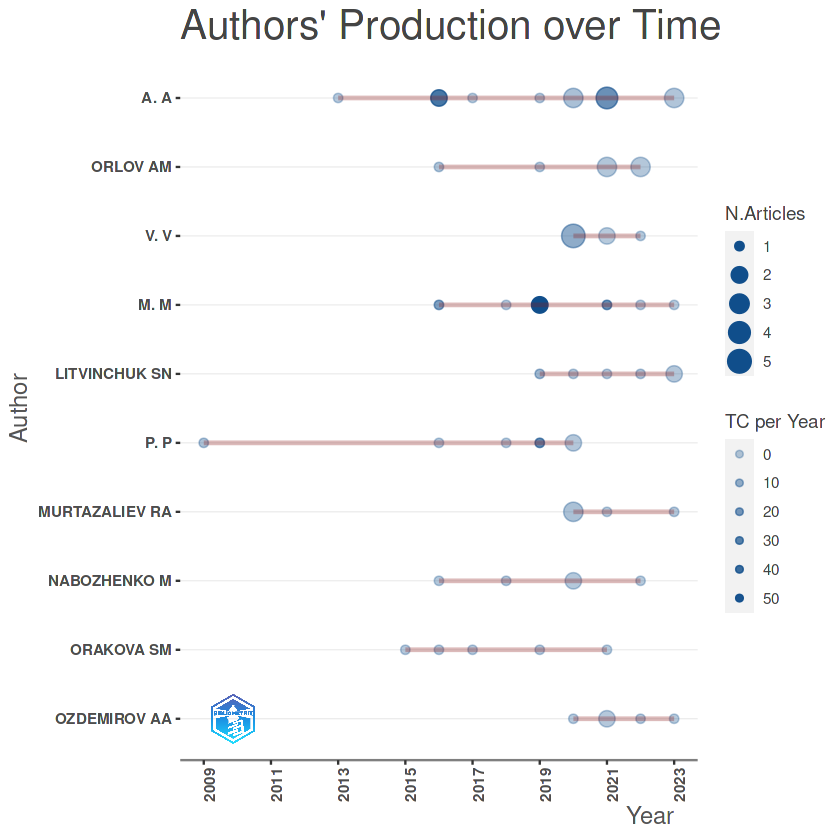

In [15]:
topAU <- authorProdOverTime(M, k = 10, graph = TRUE)

## Calculating Lotka's Law Statistics
The provided R code snippet calculates the Lotka law parameters for a given dataset and prints the results.

Breakdown:

- L <- lotka(results):
        This line calculates the Lotka law parameters for the dataset stored in the results object.

  - L$Beta:
        This line prints the value of the beta coefficient obtained from the Lotka law analysis. The beta coefficient represents the exponent in the Lotka law equation and is a measure of the distribution of citations among authors.

  - L$C:
        This line prints the value of the constant coefficient obtained from the Lotka law analysis. The constant coefficient is a scaling factor in the Lotka law equation.

  - L$R2:
        This line prints the goodness of fit score (R-squared) for the Lotka law model. This value indicates how well the Lotka law model fits the observed data.

  - L$p.value:
        This line prints the p-value for a two-sample Kolmogorov-Smirnov test comparing the observed citation distribution to the theoretical Lotka law distribution assuming a beta coefficient of 2. This test can be used to assess the statistical significance of the fit between the observed data and the Lotka law model.  The two-sample Kolmogorov-Smirnov test is a non-parametric statistical test used to determine if two samples come from the same distribution. The null hypothesis of the test is that the two samples come from the same continuous distribution. If the p-value is greater than or equal to the chosen significance level (α), we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that the two samples come from different distributions.

In [16]:
L <- lotka(results)
## Printing Beta Coefficient
L$Beta
## Printing Constant Coefficient
L$C
## Printing  Goodness of Fit Score
L$R2
## Printing p-value for Two-sample Kolmogorov-Smirnov Test (Beta=2)
L$p.value

[1] 3.214926

[1] 0.5942873

[1] 0.9077946

[1] 0.1243232

## Plotting Scientific Productivity with Theoretical Lotka Law Values

The provided R code snippet plots the observed and theoretical author productivity distributions based on the Lotka law model.


1. Observed=L$AuthorProd[,3]:
        This line extracts the third column of the AuthorProd data frame within the L object and assigns it to the Observed variable. 

  - Theoretical=10^(log10(L$C)-2*log10(L\$AuthorProd[,1])):
        This line calculates the theoretical number of publications for each author based on the Lotka law equation with a beta coefficient of 2. The formula used is:

        $$Theoretical = 10^(log10(C) - 2 * log10(AuthorProd))$$

    where C is the constant coefficient from the Lotka law analysis and AuthorProd is the observed number of publications.

2. plot(L$AuthorProd[,1],Theoretical,type="l",col="red",ylim=c(0, 1), xlab="Articles", ylab="Freq. of Authors",main="Scientific Productivity"):   

    This line creates a line plot of the theoretical author productivity distribution.
  - L$AuthorProd[,1]: This provides the x-axis values, which represent the number of publications.
  - Theoretical: This provides the y-axis values, which represent the theoretical frequency of authors with a given number of publications.
  - type="l": This specifies that the plot should be a line plot.
  - col="red": This sets the color of the line to red.
  - ylim=c(0, 1): This sets the y-axis limits to range from 0 to 1.
  - xlab="Articles": This sets the x-axis label to "Articles".
  - ylab="Freq. of Authors": This sets the y-axis label to "Freq. of Authors".
  - main="Scientific Productivity": This sets the title of the plot to "Scientific Productivity".

3. lines(L$AuthorProd[,1],Observed,col="blue"):

    This line adds a line plot of the observed author productivity distribution to the existing plot.
        The x-axis values and line type are the same as the previous plot.
        col="blue": This sets the color of the line to blue.

4. legend(x="topright",c("Theoretical (B=2)","Observed"),col=c("red","blue"),lty = c(1,1,1),cex=0.6,bty="n"):

    This line adds a legend to the plot.
  - x="topright": This specifies the location of the legend (top right corner).
  - c("Theoretical (B=2)","Observed"): This provides the labels for the two lines in the legend.
  - col=c("red","blue"): This specifies the colors corresponding to each label.
  - lty = c(1,1,1): This specifies the line types for each label (all solid lines in this case).
  - cex=0.6: This sets the size of the legend text.
  - bty="n": This removes the border around the legend box.

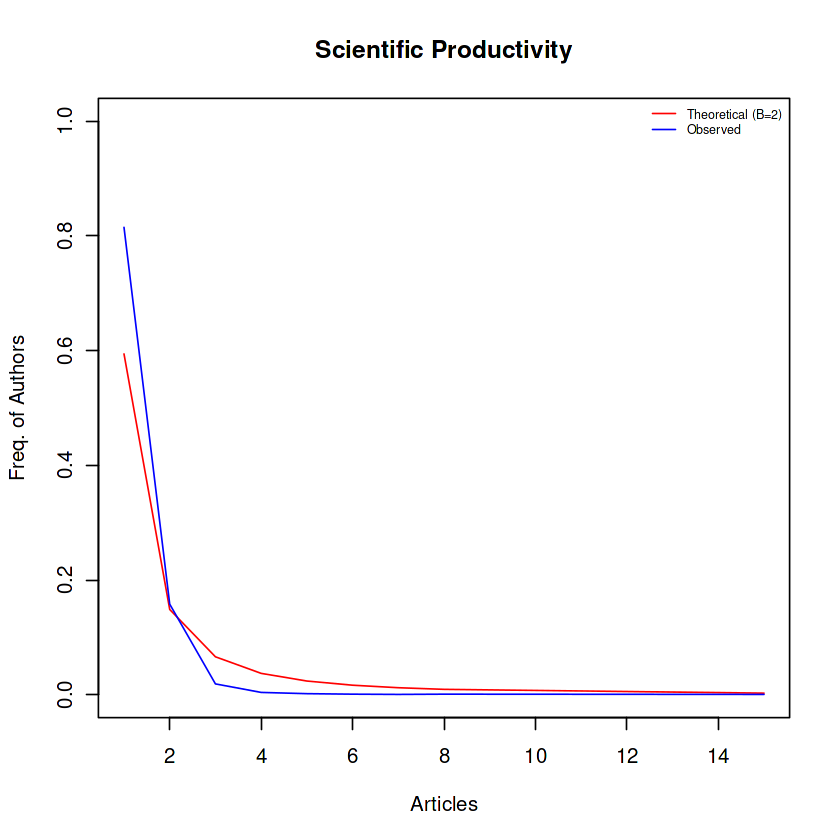

In [17]:
## Plotting Scientific Productivity with Theoretical Lotka Law Values
Observed=L$AuthorProd[,3]
Theoretical=10^(log10(L$C)-2*log10(L$AuthorProd[,1]))
plot(L$AuthorProd[,1],Theoretical,type="l",col="red",ylim=c(0, 1), 
xlab="Articles", ylab="Freq. of Authors",main="Scientific Productivity")
lines(L$AuthorProd[,1],Observed,col="blue")
legend(x="topright",c("Theoretical (B=2)","Observed"),col=c("red","blue"),
lty = c(1,1,1),cex=0.6,bty="n")

## Computing Occurrences between Elements of the Source Field in the Bibliographic Data Frame

The A <- cocMatrix(M, Field = "SO", sep = ";") code in R calculates the co-occurrence matrix of sources (SO) from the bibliographic data stored in the M data frame.

Breakdown:

- cocMatrix:
        This function from the bibliometrix package calculates the co-occurrence matrix between elements of a specified field in the bibliographic data. In this case, the field is "SO" (Source).

- M:
        This is the R data frame containing the bibliographic data.

- Field = "SO":
        This specifies that the co-occurrence matrix should be calculated based on the "SO" field, which typically contains information about the source of publication (e.g., journal name, conference name).

- sep = ";":
        This specifies the separator used to delimit multiple values in the "SO" field. In this case, it is assumed that multiple sources are separated by semicolons.

Output:

The A object will be a square matrix representing the co-occurrence relationships between different sources. The elements of the matrix indicate the number of times two sources co-occur in the same document.

In [18]:
A <- cocMatrix(M, Field = "SO", sep = ";")

## Sorting and Selecting Top 10 Sources

The provided R code snippet calculates the column sums of the matrix A and then prints the top 10 largest values.

Breakdown:

- Matrix::colSums(A):
        This calculates the sum of each column in the matrix A. The Matrix::colSums function from the Matrix package is used to ensure efficient matrix operations, especially for large matrices.
  
- sort(Matrix::colSums(A), decreasing = TRUE):
        This sorts the calculated column sums in descending order. This means that the largest values will be at the beginning of the sorted vector.

- [1:10]:
        This selects the first 10 elements of the sorted vector, effectively extracting the top 10 largest column sums from the matrix A.

- print(a):
        This prints the selected top 10 values to the console.

In [19]:
a <-sort(Matrix::colSums(A), decreasing = TRUE)[1:10]
print(a)

                                SOUTH OF RUSSIA-ECOLOGY DEVELOPMENT 
                                                                 44 
                                                    ARID ECOSYSTEMS 
                                                                 14 
                               GENETIC RESOURCES AND CROP EVOLUTION 
                                                                  8 
                                                    VOPROSY ISTORII 
                                                                  7 
       INNOVATIVE TECHNOLOGIES IN SCIENCE AND EDUCATION (ITSE-2020) 
                                                                  5 
RESEARCH JOURNAL OF PHARMACEUTICAL BIOLOGICAL AND CHEMICAL SCIENCES 
                                                                  5 
                                                            ZOOTAXA 
                                                                  5 
                                  

## Plotting Top 10 Sources

The provided R code snippet creates a data frame dt containing the names and counts of the top 10 most frequently occurring sources in a co-occurrence matrix A, then visualizes the results as a bar plot.

Breakdown:

1. dt <- tibble(Journal = names(a), Count = a):
        Creates a new data frame dt with two columns:
  - Journal: Contains the names of the sources (e.g., journal names).
  - Count: Contains the corresponding counts of the sources.
  - names(a): Extracts the names of the sources from the a vector, which is assumed to contain the sorted column sums of the co-occurrence matrix A.

2. mutate(Journal = str_to_title(Journal)):
        Modifies the Journal column to have capitalized first letters for each word. This is a common formatting convention for journal names.

3. ggplot(aes(y=Count,x = reorder(Journal, Count))):
        Initializes a ggplot object with the specified aesthetics:
  - y=Count: Sets the y-axis to represent the count of documents.
  - x = reorder(Journal, Count): Sets the x-axis to represent the journal names, reordered in descending order based on the Count column. This ensures that the bars in the plot are arranged from highest to lowest count.

4. geom_bar(stat="identity"):
        Adds a bar plot layer to the ggplot object.
            stat="identity": Indicates that the y-values should be used directly as the height of the bars, without any statistical transformations.

5. coord_flip():
        Flips the x- and y-axes of the plot, making the journal names appear vertically on the left side and the counts appear horizontally on the right side. This is a common formatting choice for bar plots with long labels on the x-axis.

6. xlab("Journal Name") + ylab("Document Count"):
        Sets the x-axis label to "Journal Name" and the y-axis label to "Document Count".

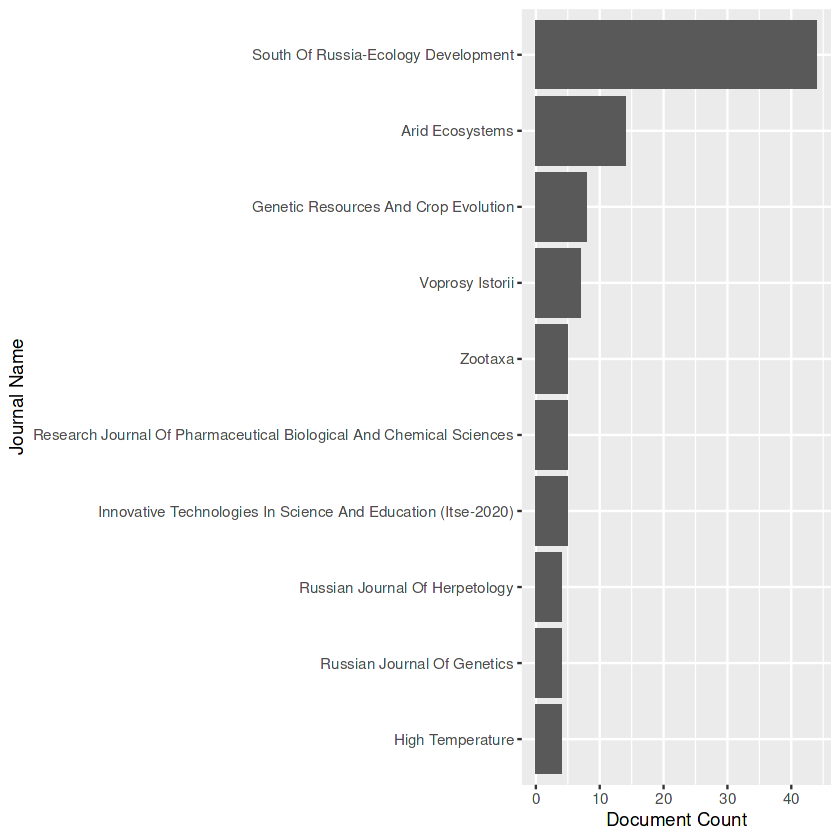

In [20]:
dt <- tibble(Journal = names(a), Count = a)  |>
	mutate(Journal = str_to_title(Journal))  
dt  |>
	ggplot(aes(y=Count,x = reorder(Journal, Count)))+
	geom_bar(stat="identity")+
	coord_flip() + xlab("Journal Name") + ylab("Document Count")

## Calculating Bradford Law Zones

The code b <- bradford(M) in R calculates the Bradford law parameters for a given dataset stored in the M data frame.

Breakdown:

- bradford:
        This function from the bibliometrix package calculates the Bradford law parameters for the dataset. The Bradford law is a model that describes the distribution of scientific publications across journals.

- M:
        This is the R data frame containing the bibliographic data. The M object is  the output of a bibliometric analysis, the one obtained using the biblioAnalysis function.

In [21]:
b <- bradford(M)

## Printing Most Relevant Sources (Bradford Zone = 1)

The code b\$table  |> filter(Zone == "Zone 1") in R filters the table element within the b object to only include rows where the Zone column is equal to "Zone 1".

Breakdown:

- b\$table:
        This accesses the table element within the b object. The b object is the list containing the results of a Bradford law analysis, and the table element  contains a data frame with information about the zones and their corresponding number of documents.

- |> filter(Zone == "Zone 1"):
        This applies the filter function from the dplyr package to the b\$table data frame.
        The filter function selects rows based on a specified condition. In this case, the condition is Zone == "Zone 1", which means that only rows where the Zone column is equal to "Zone 1" will be retained.

In [22]:
b$table  |> filter(Zone == "Zone 1")

,SO,Rank,Freq,cumFreq,Zone
,<chr>,<int>,<dbl>,<int>,<chr>
SOUTH OF RUSSIA-ECOLOGY DEVELOPMENT,SOUTH OF RUSSIA-ECOLOGY DEVELOPMENT,1,44,44,Zone 1
ARID ECOSYSTEMS,ARID ECOSYSTEMS,2,14,58,Zone 1
GENETIC RESOURCES AND CROP EVOLUTION,GENETIC RESOURCES AND CROP EVOLUTION,3,8,66,Zone 1
VOPROSY ISTORII,VOPROSY ISTORII,4,7,73,Zone 1
INNOVATIVE TECHNOLOGIES IN SCIENCE AND EDUCATION (ITSE-2020),INNOVATIVE TECHNOLOGIES IN SCIENCE AND EDUCATION (ITSE-2020),5,5,78,Zone 1
RESEARCH JOURNAL OF PHARMACEUTICAL BIOLOGICAL AND CHEMICAL SCIENCES,RESEARCH JOURNAL OF PHARMACEUTICAL BIOLOGICAL AND CHEMICAL SCIENCES,6,5,83,Zone 1
ZOOTAXA,ZOOTAXA,7,5,88,Zone 1
HIGH TEMPERATURE,HIGH TEMPERATURE,8,4,92,Zone 1
RUSSIAN JOURNAL OF GENETICS,RUSSIAN JOURNAL OF GENETICS,9,4,96,Zone 1


## Plotting Most Relevant Sources (According to Bradford's Law)

The provided R code snippet modifies the appearance of a ggplot object created by the bradford function from the bibliometrix package.

Breakdown:

- b\$graph : This extracts the ggplot object created by the bradford function and stores it in the graph variable. The bradford function typically creates a plot visualizing the Bradford law distribution.

- \+ ggtitle(""):
        This adds a blank title to the ggplot object. This removes the default title that was generated by the bradford function.

- \+ xlab(""):
        This removes the x-axis label from the ggplot object. This can be useful if the x-axis label is not informative or if you prefer a cleaner appearance.

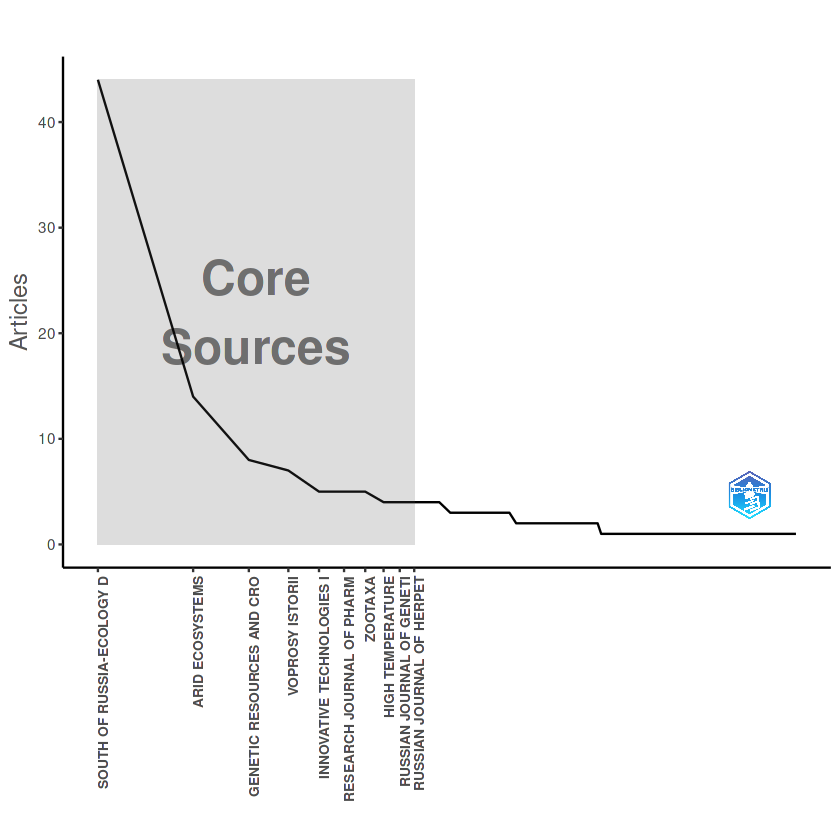

In [23]:
b$graph + ggtitle("") + xlab("")

## Preparing dataset for further analysis

The provided R code snippet extracts metadata from the bibliographic data stored in the M data frame and appends it to the original data frame.

Breakdown:

1. M <- metaTagExtraction(M, Field = "AU_CO", sep = ";"):
        This line extracts the first author's countries from the bibliographic data.
  - metaTagExtraction: This function from the bibliometrix package extracts metadata from a specified field in the bibliographic data.
  - M: This is the R data frame containing the bibliographic data.
  - Field = "AU_CO": This specifies that the metadata should be extracted from the "AU_CO" field, which typically contains information about the author's country or affiliation.
  - sep = ";": This specifies the separator used to delimit multiple values in the "AU_CO" field. In this case, it is assumed that multiple countries or affiliations are separated by semicolons.

2.     M <- metaTagExtraction(M, Field = "CR_AU", sep = ";"):
        This line extracts the first author of each cited reference from the bibliographic data.
  - The metaTagExtraction function is used again, but this time the Field is set to "CR_AU", which typically contains information about the cited reference's author.

3.     M <- metaTagExtraction(M, Field = "CR_SO", sep = ";"):
        This line extracts the publication source of each cited reference from the bibliographic data.
  - The metaTagExtraction function is used again, but this time the Field is set to "CR_SO", which typically contains information about the cited reference's source (e.g., journal, conference).

## Calculating and Plotting Co-citation Network


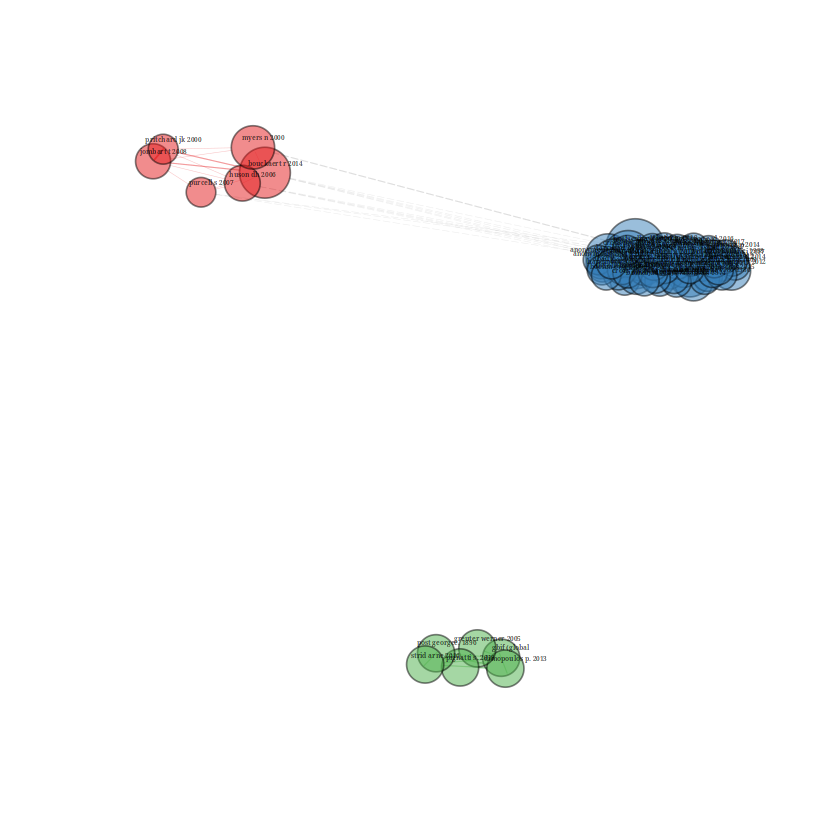

In [24]:
NetMatrix <- biblioNetwork(M, analysis = "co-citation", network = "references", sep = ";")
net=networkPlot(NetMatrix, n = 75, Title = "",
             	size=TRUE, remove.multiple=FALSE,
            	labelsize=0.3)

## Printing Statistics for the Network

1. netstat <- networkStat(NetMatrix, stat = "network", type = "degree")

- netstat: This is an object that will store the calculated network statistics.
- networkStat: This is a function from the igraph package that calculates various network statistics.
- NetMatrix: This is an input matrix representing the network. Each element in the matrix indicates the connection between two nodes.
- stat = "network": This argument specifies that we want to calculate network-level statistics.
- type = "degree": This argument specifies that we want to calculate degree-based statistics.

2. summary(netstat):
    This function provides a summary of the calculated statistics stored in the netstat object.


In [25]:
netstat <- networkStat(NetMatrix, stat = "network", type = "degree")
summary(netstat)



Main statistics about the network

 Size                                  8434 
 Density                               0.008 
 Transitivity                          0.94 
 Diameter                              10 
 Degree Centralization                 0.055 
 Average path length                   3.642 
 





## Co-citation network results

Code Breakdown:

1. tmp <- net$cluster_res:
        Assigns the cluster_res attribute of the net object to the tmp variable. This contains information about the clustering results of the network.

2. tmp <- tmp |> group_by(cluster) |> arrange(cluster,desc(btw_centrality)) |> mutate(BC=1:n()) |> arrange(cluster,desc(clos_centrality)) |> mutate(CC=1:n()) |> arrange(cluster,desc(pagerank_centrality)) |> mutate(PR=1:n()):
        This pipeline performs the following steps:
            Groups the tmp data by cluster.
            Arranges each cluster by decreasing btw_centrality and assigns a rank (1 to n) to each node as the BC column.
            Arranges each cluster by decreasing clos_centrality and assigns a rank (1 to n) to each node as the CC column.
            Arranges each cluster by decreasing pagerank_centrality and assigns a rank (1 to n) to each node as the PR column.

3. tmp$MD <- apply(tmp |> select(c(BC,CC,PR)) , 1, median):
        Calculates the median of the BC, CC, and PR columns for each row (node) and assigns it to the MD column. This represents the median rank across the three centrality measures.

4. tmp <- tmp |> group_by(cluster) |> arrange(cluster,MD) |> mutate_at(vars(4,5),\(x) round(x,5)) |> mutate_at(vars(3),\(x) format(round(x,3), nsmall = 3)) |> slice(1:10):
        Groups the tmp data by cluster again.
        Arranges each cluster by increasing MD (median rank).
        Rounds the CC and PR columns to 5 decimal places.
        Formats the BC column to 3 decimal places.
        Selects only the top 10 nodes from each cluster based on the MD rank.

5. tmp |> clipr::write_clip(allow_non_interactive = TRUE):
        Writes the tmp data to the clipboard for easy copying and pasting.

6. for (i in 1:nrow(tmp)) { ... }:
        Iterates over each row (node) in the tmp data.

7. name <- str_to_upper(str_remove_all(string = tmp$vertex[i], pattern = "\\d|-")):
        Extracts the node name from the vertex column, converts it to uppercase, and removes any digits or hyphens.

8. name <- str_remove(name,"\\s+$"):
        Removes any trailing whitespace from the node name.

9. year <- str_extract(string = tmp$vertex[i], pattern = "\\d{4}"):
        Extracts the year (4 digits) from the vertex column.

10. str_tmp <- sprintf(...):

    Constructs a formatted string containing the node name, cluster, centrality measures, ranks, and reference information.

11. cat(str_tmp):
    Prints the formatted string to the console.

12. ref <- str_extract(string=M$CR , pattern=paste0(";?",name,",.?",year,".+?;")) |> na.omit() |>unique():

    Extracts the reference information for the node from the M$CR column, removes any missing values, and returns unique references.

13. cat("REFERENCE :"):

    Prints a heading indicating that the following is reference information.

14. print(ref):

    Prints the extracted reference information.

In [26]:
fn <- "co-cite-refs.txt"
tmp <- net$cluster_res
tmp <- tmp |> group_by(cluster) |>
	arrange(cluster,desc(btw_centrality)) |>
	mutate(BC=1:n()) |>
	arrange(cluster,desc(clos_centrality)) |>
	mutate(CC=1:n()) |>
	arrange(cluster,desc(pagerank_centrality)) |>
	mutate(PR=1:n())
tmp$MD <- apply(tmp |> select(c(BC,CC,PR)) ,
                            	1, median)
tmp <- tmp |> group_by(cluster) |> arrange(cluster,MD) |>
	mutate_at(vars(4,5),\(x) round(x,5)) |>
	mutate_at(vars(3),\(x) format(round(x,3), nsmall = 3)) |>
	slice(1:10)
tmp <- tmp |>
	mutate(Paper = str_to_upper(vertex)) |>
	left_join(CR$Papers |>
            	select(Paper,DOI))
tmp |> clipr::write_clip(allow_non_interactive = TRUE)
write.table(file = fn,x = tmp)
for (i in 1:nrow(tmp)) {
	cat("\n\n\n-----------------------------------\n\n\n", file = fn, append = TRUE)
	name <- str_to_upper(str_remove_all(string = tmp$vertex[i], pattern = "\\d|-"))
	name <- str_remove(name,"\\s+$")
	year <- str_extract(string = tmp$vertex[i], pattern = "\\d{4}")
	str_tmp <- sprintf("
	Vertex name = %s; Cluster = %s;
	Betweenness Centrality (BC) = %.3f;  Closeness Centrality (CC) = %.6f; PageRank (PR) score = %.3f;
	BC rank = %s; CC Rank = %s; PR rank = %s \n
                   	", tmp[i,1], tmp[i,2], tmp[i,3], tmp[i,4], tmp[i,5],
                  	tmp[i,6], tmp[i,7], tmp[i,8])
	cat(str_tmp, file = fn, append = TRUE)
	doi <- tmp[i,11] |> unlist()
	cat("DOI :", file = fn, append = TRUE)
	cat(doi, file = fn, append = TRUE)
    cat("\n\nABSTRACT:\n", file = fn, append = TRUE)
    M |> filter(DI == tmp[i,11] |> unlist()) |> select(AB) |> 
        mutate(AB = str_to_sentence(AB)) |> unlist() |> cat(file = fn, append = TRUE)
}

Adding missing grouping variables: `cluster`
Joining with `by = join_by(Paper)`


## Calculating and Plotting Coupling-Reference Network

1. NetMatrix <- biblioNetwork(M, analysis = "coupling", network = "references", sep = ";", short = TRUE, shortlabel = FALSE):

  - NetMatrix: This will be an object storing the constructed network matrix.
  - biblioNetwork: A function from the bibliometrix package that creates a network based on bibliographic data.
  - M: The input data frame containing bibliographic information (likely with columns like ID, CR, AU, TI, etc.).
  - analysis = "coupling": Specifies that we want to create a coupling network, where nodes represent documents and edges indicate co-citation or bibliographic coupling.
  - network = "references": Indicates that the coupling should be based on references between documents.
  - sep = ";": Specifies the separator used to delimit multiple references in the CR column.
  - short = TRUE: Shortens document titles for better visualization. 
  - shortlabel = FALSE: Uses full author names instead of abbreviated ones.

2. net=networkPlot(NetMatrix,  normalize = "association", label.n = 20, weighted=T, n = 75, Title = "", type = "fruchterman", size = TRUE, edgesize = 3, labelsize = 0.3):

  - net: An object storing the network visualization parameters and the plotted network.
  - networkPlot: A function from the bibliometrix package that visualizes a network.
  - NetMatrix: The network matrix created in the previous step.
  - normalize = "association": Normalizes edge weights based on association strength.
  - label.n = 20: Labels only the top 20 nodes with the highest degree.
  - weighted = T: Uses edge weights to determine edge thickness.
  - n = 75: Sets the maximum number of iterations for the layout algorithm.
  - Title = "": Sets the plot title to an empty string.
  - type = "fruchterman": Uses the Fruchterman-Reingold algorithm for layout.
  - size = TRUE: Sizes nodes based on their degree.
  - edgesize = 3: Sets the base edge thickness.
  - labelsize = 0.3: Sets the label size.

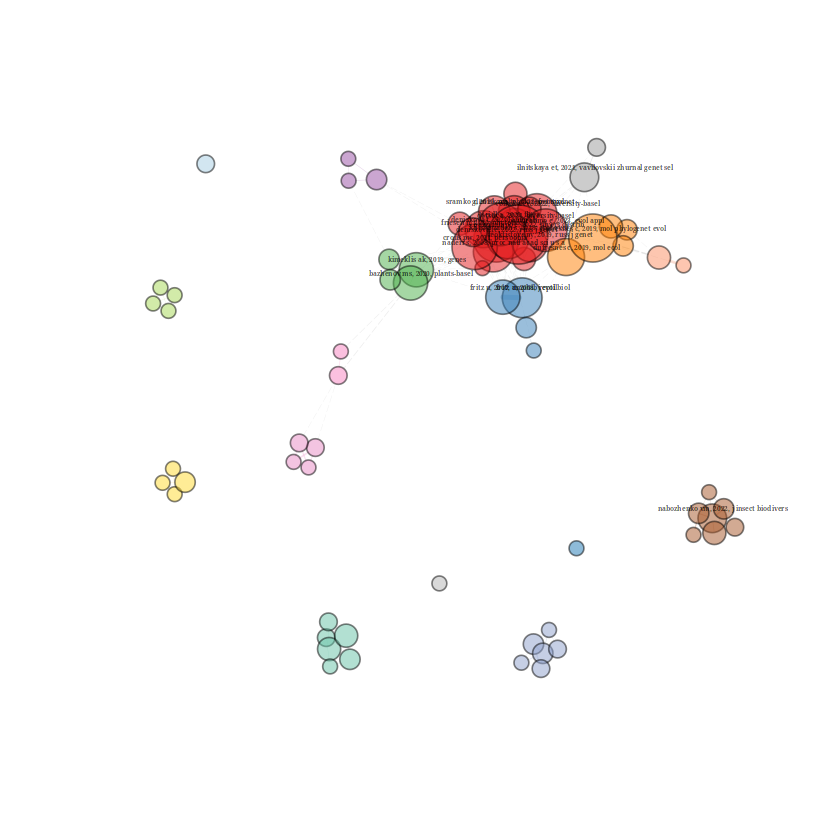

In [27]:
NetMatrix <- biblioNetwork(M, analysis = "coupling", network = "references", sep = ";", short = TRUE,
  shortlabel = FALSE)
net=networkPlot(NetMatrix,  normalize = "association",
            	label.n = 20,#halo=TRUE,
            	weighted=T, n = 75,
            	Title = "",
            	type = "fruchterman",
            	size = TRUE, edgesize = 3,
            	labelsize = 0.3)

## Printing Statistics for the Network

1. netstat <- networkStat(NetMatrix, stat = "network", type = "degree")

- netstat: This is an object that will store the calculated network statistics.
- networkStat: This is a function from the igraph package that calculates various network statistics.
- NetMatrix: This is an input matrix representing the network. Each element in the matrix indicates the connection between two nodes.
- stat = "network": This argument specifies that we want to calculate network-level statistics.
- type = "degree": This argument specifies that we want to calculate degree-based statistics.

2. summary(netstat):
    This function provides a summary of the calculated statistics stored in the netstat object.


In [28]:
netstat <- networkStat(NetMatrix, stat = "network", type = "degree")
summary(netstat)



Main statistics about the network

 Size                                  291 
 Density                               0.007 
 Transitivity                          0.449 
 Diameter                              9 
 Degree Centralization                 0.058 
 Average path length                   3.1 
 





## Coupling-reference network  results

Same codes were used same as Co-citation network results section.

In [29]:
fn <- "coupling-list.txt"
tmp <- net$cluster_res
tmp <- tmp |> group_by(cluster) |>
	arrange(cluster,desc(btw_centrality)) |>
	mutate(BC=1:n()) |>
	arrange(cluster,desc(clos_centrality)) |>
	mutate(CC=1:n()) |>
	arrange(cluster,desc(pagerank_centrality)) |>
	mutate(PR=1:n())
tmp$MD <- apply(tmp |> select(c(BC,CC,PR)) ,
                            	1, median)
tmp <- tmp |> group_by(cluster) |> arrange(cluster,MD) |>
	mutate_at(vars(4,5),\(x) round(x,5)) |>
	mutate_at(vars(3),\(x) format(round(x,3), nsmall = 3)) |>
	slice(1:10)
tmp <- tmp |>
	mutate(Paper = str_to_upper(vertex)) |>
	left_join(CR$Papers |>
            	select(Paper,DOI))
tmp |> clipr::write_clip(allow_non_interactive = TRUE)
write.table(file = fn,x = tmp)
for (i in 1:nrow(tmp)) {
	cat("\n\n\n-----------------------------------\n\n\n", file = fn, append = TRUE)
	name <- str_to_upper(str_remove_all(string = tmp$vertex[i], pattern = "\\d|-"))
	name <- str_remove(name,"\\s+$")
	year <- str_extract(string = tmp$vertex[i], pattern = "\\d{4}")
	str_tmp <- sprintf("
	Vertex name = %s; Cluster = %s;
	Betweenness Centrality (BC) = %.3f;  Closeness Centrality (CC) = %.6f; PageRank (PR) score = %.3f;
	BC rank = %s; CC Rank = %s; PR rank = %s \n
                   	", tmp[i,1], tmp[i,2], tmp[i,3], tmp[i,4], tmp[i,5],
                  	tmp[i,6], tmp[i,7], tmp[i,8])
	cat(str_tmp, file = fn, append = TRUE)
	doi <- tmp[i,11] |> unlist()
	cat("DOI :", file = fn, append = TRUE)
	cat(doi, file = fn, append = TRUE)
    cat("\n\nABSTRACT:\n", file = fn, append = TRUE)
    M |> filter(DI == tmp[i,11] |> unlist()) |> select(AB) |> 
        mutate(AB = str_to_sentence(AB)) |> unlist() |> cat(file = fn, append = TRUE)
}

Adding missing grouping variables: `cluster`
Joining with `by = join_by(Paper)`


In [30]:
## Calculating and Plotting Collaboration Between Countries Network


In [31]:
# NetMatrix <- biblioNetwork(M, analysis = "collaboration", network = "countries", sep = ";")
# net=networkPlot(NetMatrix, n = 75, Title = "",
#              	size=TRUE, remove.multiple=TRUE,
#             	labelsize=0.3,cluster="none")

## Preparing and Plotting the Thematic Map


In [32]:
lst <- M |> count(PY) |> mutate(tot = cumsum(n), cut_points = cut(tot, breaks = seq(0,to = nrow(M)+1,length.out = 5),labels = 1:4))
# print(lst)

In [33]:
syns <- c("dagestan;daghestan","chechnya;chechnia")
r.terms <- NULL
thema <- function(dt = M) {
    res <- thematicMap(dt, field = "TI", n = 100, minfreq = 5, size = 0.5, n.labels = 5, repel = TRUE, synonyms = syns, remove.terms = r.terms)
    return (res)
}


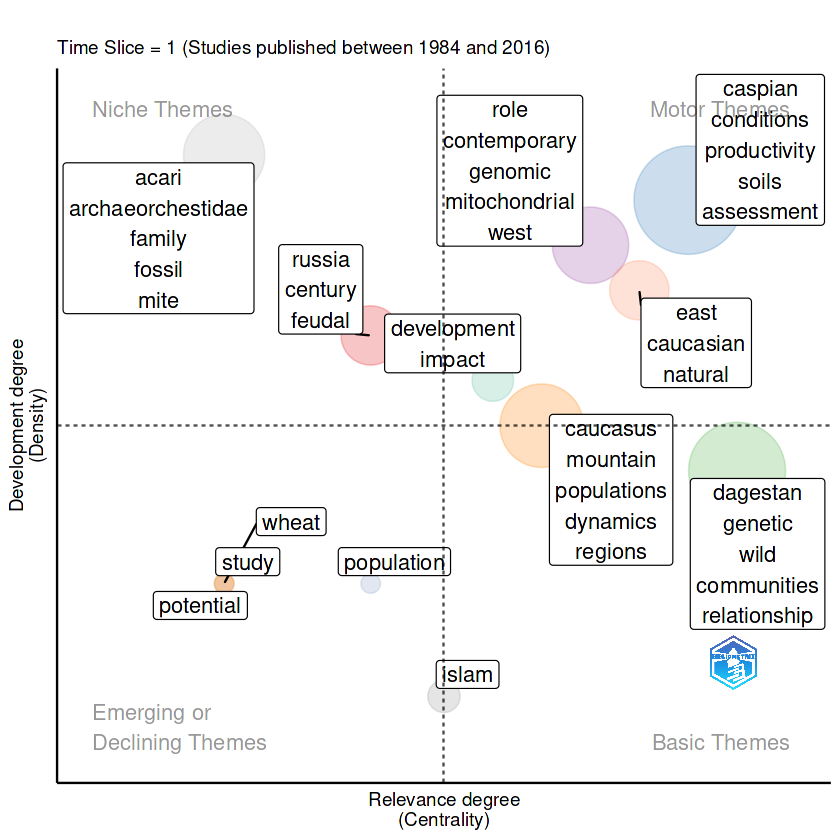

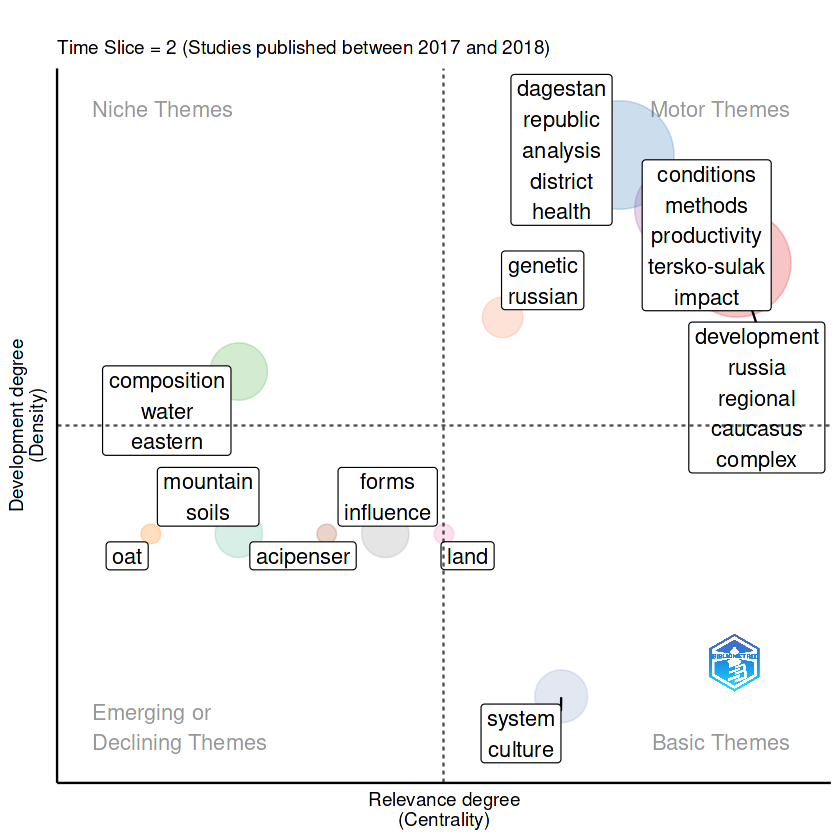

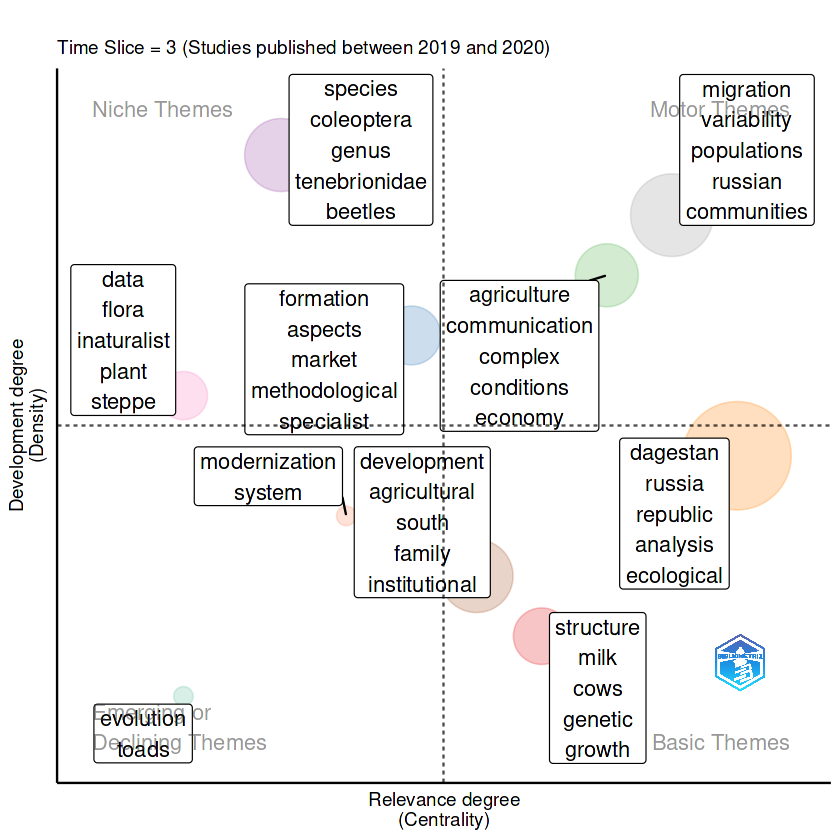

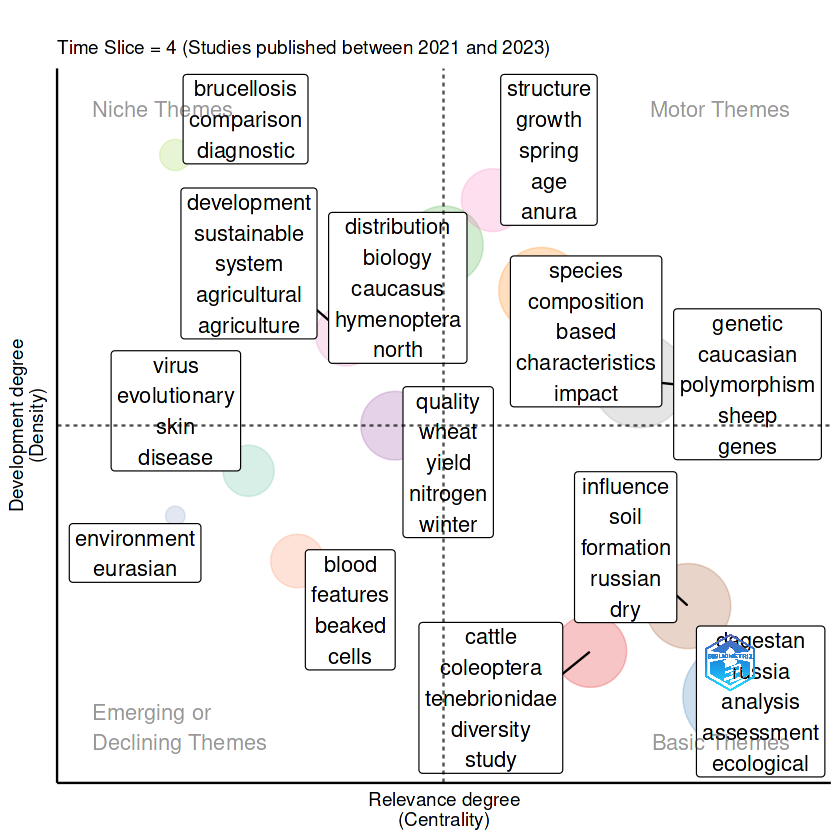

In [34]:
for(i in 1:4) {
    lst2 <- lst$PY[lst$cut_points == i]
    lab <- sprintf("Time Slice = %d (Studies published between %s and %s)",i,head(lst2,1),tail(lst2,1))
    res <- thema(M|> filter(PY %in% lst2))
    plt <- res$map +
        ggtitle (subtitle = lab,label = "" )
    plot(plt)
}
